# Gradient Boosting

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

### Model 1
#### Read CSV

In [2]:
train_m1 = pd.read_csv('../../../../Data_AA2/train_m1.csv', sep = ',')
train_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,-0.756929,-1.925779,0.580938,-0.515445,0.939376,-0.453565,-0.763196,1.192581,0.001762,...,-0.561357,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.259352,0.395979,0
1,0.37521,1.471189,-0.283258,-0.824024,-0.515445,0.939376,-0.453565,1.310279,-0.098471,-0.713715,...,0.148956,0.196894,-0.348973,0.188003,0.837519,1.529013,-0.281151,0.769787,0.843536,0
2,0.37521,0.078615,-0.283258,1.049258,-0.515445,0.939376,-0.453565,-0.763196,-1.389523,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.773829,0.843536,0
3,0.37521,-0.756929,-0.283258,-0.824024,-0.515445,-1.090085,-0.453565,1.310279,1.192581,1.432715,...,-0.206200,0.196894,-0.348973,0.188003,-0.118566,-0.651221,-0.324357,0.284758,0.395979,0
4,0.37521,-1.035444,-1.925779,1.049258,1.938451,0.939376,-0.453565,1.310279,0.762230,-0.713715,...,0.859269,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0


In [3]:
test_m1 = pd.read_csv('../../../../Data_AA2/test_m1.csv', sep = ',')
test_m1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.37521,1.471189,-0.283258,0.580938,-0.515445,0.939376,-0.453565,1.310279,0.762230,0.717238,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.710313,0.329470,0
1,0.37521,0.914159,-1.925779,-0.355703,-0.515445,-1.090085,-0.453565,1.310279,0.762230,1.432715,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.709736,0.329470,0
2,0.37521,1.471189,-0.283258,0.580938,1.938451,0.939376,-0.453565,1.310279,0.762230,-1.429191,...,-0.561357,0.196894,-0.348973,0.188003,0.646302,0.717242,0.885411,0.711468,0.329470,0
3,0.37521,-0.756929,1.359263,-1.760665,-0.515445,-1.090085,-0.453565,-0.763196,0.762230,1.432715,...,-0.561357,0.196894,1.662067,-2.562036,-1.202130,-1.180338,-1.231682,-1.354522,-0.943918,0
4,0.37521,-1.035444,-0.283258,1.049258,1.938451,0.939376,-0.453565,-0.763196,-1.389523,0.717238,...,0.148956,0.196894,-0.348973,0.188003,0.837519,-0.230686,0.950220,0.771519,0.843536,0


In [4]:
#get target
train_m1_target = train_m1['y']
train_m1 = train_m1.drop(columns=['y'])

In [5]:
#get target
test_m1_target = test_m1['y']
test_m1 = test_m1.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,30)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m1,train_m1_target)
    predictions = clf.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [13:03<00:00, 27.02s/it]


Text(0, 0.5, 'Error Rate')

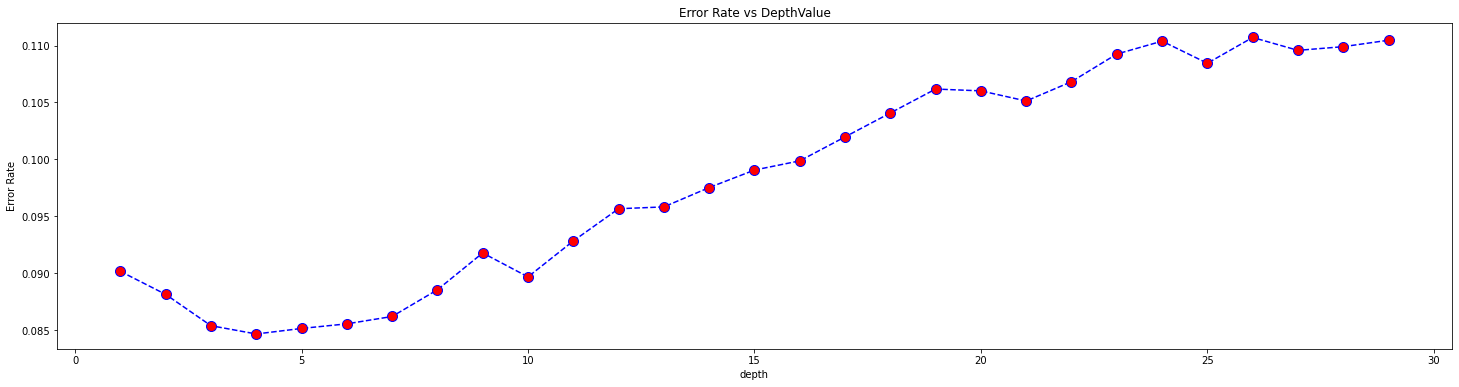

In [7]:
plt.figure(figsize=(25,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [12]:
%%time
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1,2],
    "max_depth":range(3,6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5,1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m1, train_m1_target)

print (opt_model_gb.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 1/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estim

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 3/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 7/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 10/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 11/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 11/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 11/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 14/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 14/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 14/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 14/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 14/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 14/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 19/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 19/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 19/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 19/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 19/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 19/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 21/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 22/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 22/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 22/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 22/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 22/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 27/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 27/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 27/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 27/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 27/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 27/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 30/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 30/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 30/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 35/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 35/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 35/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 35/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 35/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 35/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 39/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 39/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 39/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 3/5; 39/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 39/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 39/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 41/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 41/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 41/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 41/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 41/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 41/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 47/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 47/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 47/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 47/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 47/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 47/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 49/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 49/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 49

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 53/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 54/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 54/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 54/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 54/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 54

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 57/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 58/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 58/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 58/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 58/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 58

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 61/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 62/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 62/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 62

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 67/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 67/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 67

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 69/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 69/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 69/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 70/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 70/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 70

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 74/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 74/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 74/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 74/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 74/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 74

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 79/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 79/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 79

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 82/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 82/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 82/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 82/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 82/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 82

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 87/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 87/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 87/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 87/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 87/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 87

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 90/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 90/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 90/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 90/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 90/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 90

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 95

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 97/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 97/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 97/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 98/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 98/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 98/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 103/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 103/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 107/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 107/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 107/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 107/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 107/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 107/144] END criter

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 109/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 109/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 109/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 109/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 109/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 115/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 115/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 115/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 115/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 122/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 122/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 122/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 122/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 122/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 130/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 130/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 130/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 131/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 131/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 135/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 135/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 135/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 135/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 135/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 141/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 142/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 142/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 142/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 142/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 14

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88723943 0.88723943        nan        nan
 0.88723943 0.88723943        nan        nan 0.88723943 0.88723943
        nan        nan 0.88723943 0.88723943        nan        nan
 0.88723943 0.88723943        nan        nan 0.88723943 0.88723943
        nan        nan 0.88723943 0.88723943        nan        nan
 0.88723943 0.88723943        nan        nan 0.88723943 0.88723943
        nan        nan 0.88723943 0.88723943        nan        nan
 0.88723943 0.88723943        nan        nan 0.88723943 0.88723943
        nan        nan 0.88723943 0.88723943        nan        nan
 0.88723943 0.88723943        nan        nan 0.88723943 0.88723943
        nan        nan 0.88723943 0.88723943        nan        nan
 0.88723943 0.88723943        nan        nan 0.88723943 0.88723943
        nan        nan 0.88723943 0.88723943        n

#### Create and fit the model

In [20]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier(max_depth=4)#learning_rate=0.01, max_features='log2', n_estimators=10, subsample=0.5)
# Results gridSearch are not optmizing accuracy really well

# Fit the best model
gb_best_model.fit(train_m1, train_m1_target)
gb_best_model

GradientBoostingClassifier(max_depth=4)

In [21]:
predictions = gb_best_model.predict(test_m1)

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0     1    All
Actual                       
0          10612   356  10968
1            690   699   1389
All        11302  1055  12357


In [22]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.915352


In [23]:
# Report
print(classification_report(test_m1_target,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.50      0.57      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.92      0.91     12357



In [24]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m1, train_m1_target, cv = 5).mean()
pecc_gb

0.9140161940198098

### Model 2
#### Read CSV

In [25]:
train_m2 = pd.read_csv('../../../../Data_AA2/train_m2.csv', sep = ',')
train_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.836283,-1.028419,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,-0.699689,1.145570,-0.014944,...,-0.187885,0.213335,-0.373253,0.190666,-0.011801,-0.548958,-0.289686,0.352458,0.470978,0
1,0.406241,-1.028419,1.292265,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-1.366988,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.851480,0.899436,0
2,0.406241,0.353247,-1.910223,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-0.529469,0.700143,...,-0.187885,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.849794,0.899436,0
3,0.406241,-0.475752,-0.308979,1.086428,-0.009681,-1.090125,-0.43243,-0.699689,-0.529469,1.415229,...,0.549049,0.213335,-0.373253,0.190666,0.919127,0.676764,-0.435341,0.850918,0.899436,0
4,0.406241,0.076914,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.366988,0.700143,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,-0.132418,0.937972,0.852604,0.899436,0


In [26]:
test_m2 = pd.read_csv('../../../../Data_AA2/test_m2.csv', sep = ',')
test_m2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.406241,-0.752086,1.292265,-0.922449,-0.009681,0.917326,-0.43243,1.429206,-0.110709,-0.014944,...,2.759852,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.796408,0.899436,0
1,0.406241,1.458580,1.292265,0.584209,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,0.180582,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
2,0.406241,-0.475752,-0.308979,1.086428,-0.009681,0.917326,-0.43243,-0.699689,-1.785748,1.415229,...,-0.556353,0.213335,3.485114,-2.416003,-1.066853,-0.762350,-1.350882,-1.142923,-0.811744,0
3,0.406241,-0.752086,-1.910223,-0.420230,-0.009681,0.917326,-0.43243,1.429206,-0.110709,1.415229,...,-0.556353,0.213335,-0.373253,0.190666,0.919127,1.610567,-0.248071,0.848670,0.899436,0
4,0.406241,0.076914,-0.308979,0.584209,-0.009681,-1.090125,-0.43243,1.429206,0.726810,-1.445118,...,-0.556353,0.213335,-0.373253,0.190666,0.732941,0.806507,0.875548,0.792474,0.407306,0


In [27]:
#get target
train_m2_target = train_m2['y']
train_m2 = train_m2.drop(columns=['y'])

In [28]:
#get target
test_m2_target = test_m2['y']
test_m2 = test_m2.drop(columns=['y'])

### Check for lower errors

In [29]:
error_rate = []

for i in tqdm(range(1,25)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m2,train_m2_target)
    predictions = clf.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [07:12<00:00, 18.03s/it]


Text(0, 0.5, 'Error Rate')

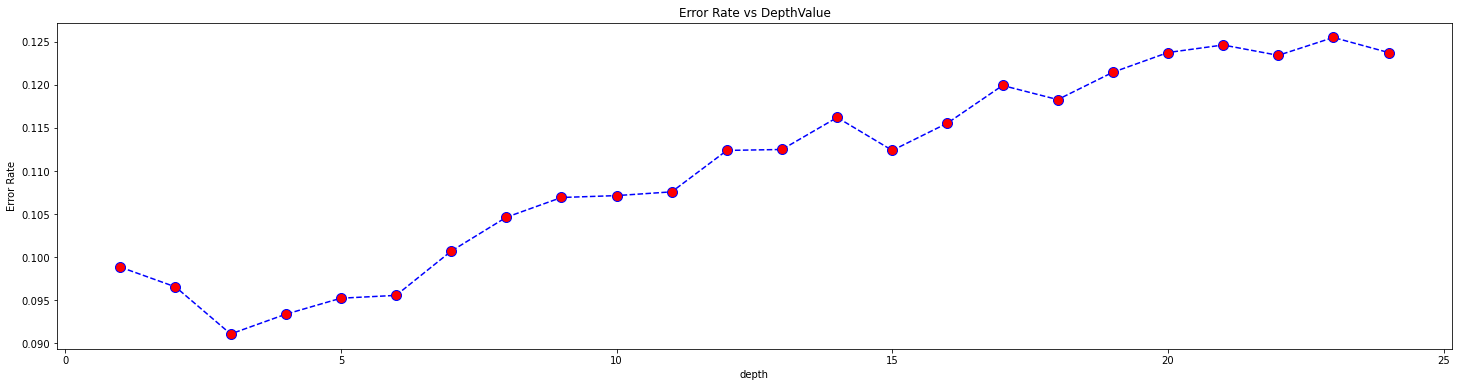

In [30]:
plt.figure(figsize=(25,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [31]:
%%time
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1,2],
    "max_depth":range(3,6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5,1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m2, train_m2_target)

print (opt_model_gb.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 1/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estim

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 3/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 7/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 11/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 11/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 11/144] END criterion=fr

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 15/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 15/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 15/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 15/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 15/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 15/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 18/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 18/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 18/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 18/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 18/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 18/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 23/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 23/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 23/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 26/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 26/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 26/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 26/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 26/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 26/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 30/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 30/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 30/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 33/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 33/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 33/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 33/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 33/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 34/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 39/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 39/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 39/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 39/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 39/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 39/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 43/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 43/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 4/5; 43/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 46/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 46/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 46/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 47/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 47/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 47/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 49/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 49/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 49

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 53/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 53/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 53/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 53/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 53/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 53

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 59/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 59/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 59/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 59/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 59/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 59/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 62/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 62/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 62

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 66/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 66/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 66/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 66/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 66/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 66

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 69/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 69/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 69/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 69/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 69/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 69

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 75/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 75/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 75/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 75/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 75/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 75/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 79/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 79/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 79

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 82/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 83/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 83/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 83/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 83/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 83

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 86/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 86/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 86/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 86/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 86/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 86

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 89/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 89/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 89/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 89/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 89/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 89

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 95/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 97/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 97/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 97/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 97/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 97/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 98/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 103/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 103/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 106/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 106/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 106/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 106/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 106/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 109/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 109/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 109/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 109/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 109/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 115/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 115/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 115/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 115/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 117/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 117/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 117/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 117/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 117/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 123/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 123/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 123/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 123/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 123/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 129/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 129/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 129/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 129/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 129/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 134/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 135/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 135/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 135/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 135/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 143/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 143/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 143/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 143/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 143/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 14

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.87320183 0.87320183        nan        nan
 0.87320183 0.87320183        nan        nan 0.87320183 0.87320183
        nan        nan 0.87320183 0.87320183        nan        nan
 0.87320183 0.87320183        nan        nan 0.87320183 0.87320183
        nan        nan 0.87320183 0.87320183        nan        nan
 0.87320183 0.87320183        nan        nan 0.87320183 0.87320183
        nan        nan 0.87320183 0.87320183        nan        nan
 0.87320183 0.87320183        nan        nan 0.87320183 0.87320183
        nan        nan 0.87320183 0.87320183        nan        nan
 0.87320183 0.87320183        nan        nan 0.87320183 0.87320183
        nan        nan 0.87320183 0.87320183        nan        nan
 0.87320183 0.87320183        nan        nan 0.87320183 0.87320183
        nan        nan 0.87320183 0.87320183        n

#### Create and fit the model

In [32]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier(max_depth=3)

# Fit the best model
gb_best_model.fit(train_m2, train_m2_target)
gb_best_model

GradientBoostingClassifier()

In [33]:
predictions = gb_best_model.predict(test_m2)

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0    1   All
Actual                    
0          7711  283  7994
1           549  604  1153
All        8260  887  9147


In [34]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.909041


In [35]:
# Report
print(classification_report(test_m2_target,predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7994
           1       0.68      0.52      0.59      1153

    accuracy                           0.91      9147
   macro avg       0.81      0.74      0.77      9147
weighted avg       0.90      0.91      0.90      9147



In [36]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m2, train_m2_target, cv = 5).mean()
pecc_gb

0.9023478037322754

### Model 3
#### Read CSV

In [37]:
train_m3 = pd.read_csv('../../../../Data_AA2/train_m3.csv', sep = ',')
train_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,1.468709,1.315671,0.575506,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.727884,...,-0.167650,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.113536,-0.696420,0
1,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.204000,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.905339,0.940431,0
2,0.430712,-1.026811,1.315671,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-1.335529,0.009410,...,-0.167650,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.905889,0.940431,0
3,2.595616,0.359589,-0.284073,-1.944969,-0.009193,-1.037765,-0.409284,-0.661530,-0.922053,1.446358,...,-0.167650,0.249588,-0.390321,0.162454,-1.705780,-1.326568,1.529138,-1.430308,-1.655691,1
4,0.430712,1.468709,-0.284073,1.079601,-0.009193,-1.037765,-0.409284,-0.661530,-1.335529,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,-0.097719,0.901635,0.906989,0.940431,0


In [38]:
test_m3 = pd.read_csv('../../../../Data_AA2/test_m3.csv', sep = ',')
test_m3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,-0.508577,-0.709064,...,0.947301,0.249588,-0.390321,0.162454,0.971222,0.699099,-0.434338,0.904239,0.940431,0
1,0.430712,-1.026811,-0.284073,-0.432684,-0.009193,0.963609,-0.409284,1.511648,0.731850,0.009410,...,0.575650,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.849244,0.469678,0
2,0.430712,-1.026811,-0.284073,-1.440874,-0.009193,0.963609,2.443291,1.511648,0.731850,0.727884,...,-0.539300,0.249588,-0.390321,0.162454,0.788699,0.826859,0.840909,0.847594,0.469678,0
3,0.430712,-1.026811,-0.284073,1.079601,-0.009193,0.963609,-0.409284,-0.661530,-0.095102,-0.709064,...,-0.539300,0.249588,1.459600,-2.255863,-1.644939,-0.906305,-0.049740,-1.155332,-0.986993,0
4,0.430712,-0.749531,-0.284073,-1.440874,-0.009193,0.963609,-0.409284,-0.661530,0.731850,0.727884,...,0.947301,0.249588,-0.390321,0.162454,-0.975689,-1.023979,-1.142809,-1.084388,-0.696420,0


In [39]:
#get target
train_m3_target = train_m3['y']
train_m3 = train_m3.drop(columns=['y'])

In [40]:
#get target
test_m3_target = test_m3['y']
test_m3 = test_m3.drop(columns=['y'])

### Check for lower errors

In [41]:
error_rate = []

for i in tqdm(range(1,25)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m3,train_m3_target)
    predictions = clf.predict(test_m3)
    error_rate.append(np.mean(predictions != test_m3_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [08:44<00:00, 21.86s/it]


Text(0, 0.5, 'Error Rate')

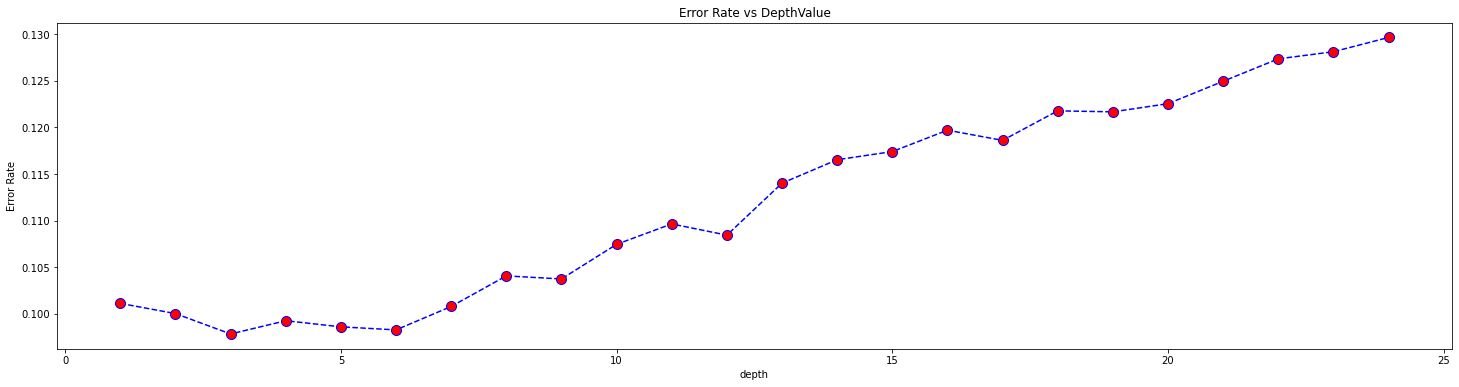

In [42]:
plt.figure(figsize=(25,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [43]:
%%time
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1,2],
    "max_depth":range(3,6),
    "max_features":["log2","sqrt"],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m3, train_m3_target)

print (opt_model_gb.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 1/5; 1/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5; 1/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/5; 1/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5; 1/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 3/5; 1/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5; 1/72]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 2/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 2/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 2/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 2/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 2/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 2/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/5; 2/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_featu

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 4/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 4/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 4/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 4/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 4/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 4/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 4/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_featu

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 6/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 6/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 6/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 6/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 6/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 6/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 6/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_featu

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 7/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5; 7/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 3/5; 7/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5; 7/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 4/5; 7/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5; 7/72] START learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10
[CV 5/5; 7/72] END learning_rate=0.01, loss=deviance, max_depth=3, max_featu

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 10/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 10/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 10/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 10/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 10/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 10/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 5/5; 10/72] START learning_rate=0.01, loss=deviance, max_depth=4,

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 12/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5; 12/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 12/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 12/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 12/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 12/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 12/72] END learning_rate=0.01, loss=deviance, max_depth=4, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 14/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 14/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 14/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 14/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 14/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 14/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 14/72] END learning_rate=0.01, loss=deviance, max_depth=4, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 16/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 16/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 16/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 16/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 16/72] END learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 16/72] START learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 16/72] END learning_rate=0.01, loss=deviance, max_depth=4, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 18/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 18/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 18/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 18/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 18/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 18/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 18/72] END learning_rate=0.01, loss=deviance, max_depth=5, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 20/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 20/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 20/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 20/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 20/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 20/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 20/72] START learning_rate=0.01, loss=deviance, max_depth=5,

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 22/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 22/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 22/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 22/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 22/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 22/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/5; 22/72] END learning_rate=0.01, loss=deviance, max_depth=5, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 24/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 24/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 24/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 24/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 24/72] END learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 24/72] START learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 24/72] END learning_rate=0.01, loss=deviance, max_depth=5, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 3/5; 26/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 26/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 26/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 26/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 26/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/5; 26/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5; 27/72] START learning_rate=0.025, loss=deviance, max_d

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 28/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 28/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 28/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 28/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 28/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 28/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 28/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 30/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 30/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 30/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 30/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 30/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 30/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/5; 30/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 32/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 32/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 32/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 32/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 32/72] START learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 32/72] END learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 32/72] START learning_rate=0.025, loss=deviance, max_d

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 34/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 34/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 34/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 34/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 34/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 34/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/5; 34/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 36/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 36/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 36/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 36/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 36/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 36/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 36/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 38/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 2/5; 38/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 38/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 38/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 38/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 38/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 38/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 40/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 40/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 40/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 40/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 40/72] END learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 40/72] START learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 40/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 42/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 42/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 42/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 42/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 42/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5; 42/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 42/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 44/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 44/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 44/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5; 44/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 44/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 44/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 44/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 46/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 46/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5; 46/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 46/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 46/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 46/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 46/72] START learning_rate=0.025, loss=deviance, max_d

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 48/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 48/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 48/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 48/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 48/72] END learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 48/72] START learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 48/72] END learning_rate=0.025, loss=deviance, max_dept

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 50/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 50/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 50/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 50/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 50/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 50/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 50/72] START learning_rate=0.05, loss=deviance, max_depth=3,

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 52/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 52/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 52/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 52/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 52/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 52/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 52/72] END learning_rate=0.05, loss=deviance, max_depth=3, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 54/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 54/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 54/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 54/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 54/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 54/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 5/5; 54/72] END learning_rate=0.05, loss=deviance, max_depth=3, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 56/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 56/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 56/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 56/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 56/72] END learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 56/72] START learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 56/72] END learning_rate=0.05, loss=deviance, max_depth=3, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 57/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5; 57/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 2/5; 57/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5; 57/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 3/5; 57/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5; 57/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10
[CV 4/5; 57/72] END learning_rate=0.05, loss=deviance, max_depth=4, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 60/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 60/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 60/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 60/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 60/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 60/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 60/72] END learning_rate=0.05, loss=deviance, max_depth=4, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 62/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 62/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 62/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 62/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5; 62/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 62/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 62/72] START learning_rate=0.05, loss=deviance, max_depth=4,

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 64/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 64/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 64/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 64/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 64/72] END learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 64/72] START learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 64/72] END learning_rate=0.05, loss=deviance, max_depth=4, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 66/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5; 66/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 66/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 66/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 66/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 66/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 66/72] END learning_rate=0.05, loss=deviance, max_depth=5, ma

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 68/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5; 68/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 68/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5; 68/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 68/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 68/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 5/5; 68/72] END learning_rate=0.05, loss=deviance, max_depth=5, m

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 70/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 70/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5; 70/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 70/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5; 70/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 4/5; 70/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5; 70/72] START learning_rate=0.05, loss=deviance, max_depth=5,

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 72/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 2/5; 72/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 3/5; 72/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 3/5; 72/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 4/5; 72/72] START learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10
[CV 4/5; 72/72] END learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV 5/5; 72/72] START learning_rate=0.05, loss=deviance, max_depth=5,

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78875322        nan 0.78875322
        nan 0.78875322        nan 0.78887996        nan 0.78934471
        nan 0.78879547        nan 0.78879547        nan 0.79149938
        nan 0.79107699        nan 0.7916683         nan 0.78951369]
  warnings.warn(


#### Create and fit the model

In [48]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier(max_depth=3)

# Fit the best model
gb_best_model.fit(train_m3, train_m3_target)
gb_best_model

GradientBoostingClassifier()

In [49]:
predictions = gb_best_model.predict(test_m3)

# Confusion matrix
confusion = pd.crosstab(test_m3_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     0     1   All
Actual                     
0          7443   517  7960
1           378   809  1187
All        7821  1326  9147


In [50]:
# Accuracy
score = accuracy_score(test_m3_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.902154


In [51]:
# Report
print(classification_report(test_m3_target,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7960
           1       0.61      0.68      0.64      1187

    accuracy                           0.90      9147
   macro avg       0.78      0.81      0.79      9147
weighted avg       0.91      0.90      0.90      9147



In [52]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m3, train_m3_target, cv = 5).mean()
pecc_gb

0.8794206932404155

### Model 4
#### Read CSV

In [2]:
train_m4 = pd.read_csv('../../../../Data_AA2/train_m4.csv', sep = ',')
train_m4.head()

,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.038917,1.363073,-0.351284,-0.512695,1.325358,0.350664,-0.204429,0.196894,-0.351367,0.195096,0.840943,1.537557,-0.279432,0.778118,0.846583,0
1,-0.761163,-0.286126,-0.820426,-0.512695,1.325358,1.966453,0.156584,0.196894,-0.351367,0.195096,0.840943,0.594054,-0.473904,0.774087,0.846583,1
2,-1.038917,-0.286126,1.056145,-0.512695,-0.754513,-0.457231,-0.565442,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.325914,-0.938246,0
3,-1.038917,1.363073,1.056145,-0.512695,1.325358,0.350664,-0.565442,0.196894,-0.351367,0.195096,-1.193288,-0.860010,-1.424658,-1.272939,-0.938246,0
4,-1.038917,-0.286126,1.056145,1.948838,1.325358,-1.265125,0.517596,0.196894,-0.351367,0.195096,0.840943,1.537557,-0.279432,0.771208,0.846583,0


In [3]:
test_m4 = pd.read_csv('../../../../Data_AA2/test_m4.csv', sep = ',')
test_m4.head()

,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.349854,-0.286126,-0.351284,-0.512695,-0.754513,1.158558,-0.565442,0.196894,-0.351367,0.195096,-0.112602,-0.644401,-0.322648,0.265066,0.399684,1
1,0.905362,-0.286126,-0.351284,1.948838,-0.754513,-1.265125,-0.565442,0.196894,-0.351367,0.195096,-0.112602,-0.644401,-0.322648,0.233396,0.399684,0
2,-0.761163,-0.286126,-1.758712,1.948838,1.325358,-0.457231,-0.565442,0.196894,-0.351367,0.195096,0.650234,0.725144,0.887403,0.714778,0.333271,0
3,1.460871,1.363073,1.056145,-0.512695,-0.754513,1.966453,-0.565442,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.333976,-0.938246,1
4,-1.038917,-1.935325,-0.351284,-0.512695,1.325358,-1.265125,-0.204429,0.196894,1.645136,-2.544702,-1.193288,-1.173936,-1.230186,-1.333976,-0.938246,0


In [4]:
#get target
train_m4_target = train_m4['y']
train_m4 = train_m4.drop(columns=['y'])

In [5]:
#get target
test_m4_target = test_m4['y']
test_m4 = test_m4.drop(columns=['y'])

### Check for lower errors

In [6]:
error_rate = []

for i in tqdm(range(1,25)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m4,train_m4_target)
    predictions = clf.predict(test_m4)
    error_rate.append(np.mean(predictions != test_m4_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [10:08<00:00, 25.35s/it]


Text(0, 0.5, 'Error Rate')

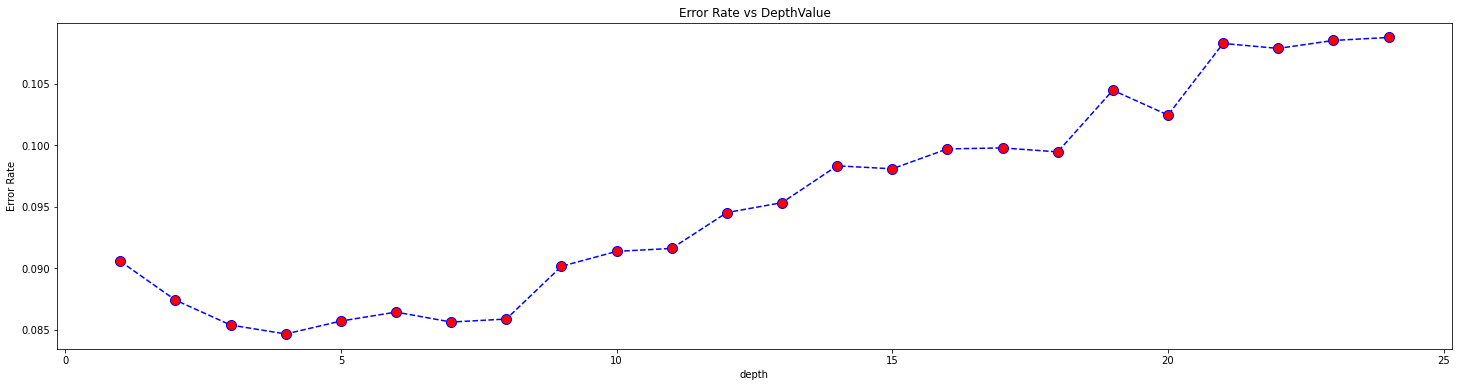

In [7]:
plt.figure(figsize=(25,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [8]:
%%time
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1,2],
    "max_depth":range(3,6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5,1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m4, train_m4_target)

print (opt_model_gb.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 1/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estim

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 3/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 6/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 6/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 6/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 6/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 6/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 7/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 11/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 11/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 11/144] END criterion=fr

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 14/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 15/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 15/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 15/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 15/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 15/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 4/5; 17/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 17/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 17/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 17/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 18/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 18/144] END criterion=fr

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 22/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 22/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 22/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 23/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 23/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 27/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 27/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 27/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 27/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 27/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 27/144] END criterion=fr

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 30/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 30/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 30/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 30/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 33/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 33/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 33/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 33/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 33/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 33/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 5/5; 37/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 37/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 38/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 38/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 38/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 38/144] END criterion=fr

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 43/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 43/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 43/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 45/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 46/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 46/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 46/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 46/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 46/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 49/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 49/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 49/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 49

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 54/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 54/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 54/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 54/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 54/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 54

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 57/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 57/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 57/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 57/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 57/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 57

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 63/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 63/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 63/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 63/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 63/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 63/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 67/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 67/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 67

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 71/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 71/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 71/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 71/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 71/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 71/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 73/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 73/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 73/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 74/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 74/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 74

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 4/5; 78/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 78/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 78/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 79/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 79/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 7

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 81/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 81/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 81/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 82/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 82/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 82

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 85/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 85/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 85/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 85/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 85/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 85

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 91/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 91/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 91/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 91/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 91/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 4/5; 91

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 2/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 3/5; 95/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 95/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 4/5; 95

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 99/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 99/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 99/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 99/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 99/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 99/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 3/5; 101/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 101/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 101/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 101/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 101/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 1

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 105/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 105/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 105/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 105/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 3/5; 105/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 111/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 111/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 111/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 111/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 111/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 114/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 114/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 119/144] END criter

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 123/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 123/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 123/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 123/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 123/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 131/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.1s
[CV 2/5; 131/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 131/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 131/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 131/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 134/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 134/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 134/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 134/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 134/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 141/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 141/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 141/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 142/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 142/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 14

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88727411 0.88727411        nan        nan
 0.88727411 0.88727411        nan        nan 0.88727411 0.88727411
        nan        nan 0.88727411 0.88727411        nan        nan
 0.88727411 0.88727411        nan        nan 0.88727411 0.88727411
        nan        nan 0.88727411 0.88727411        nan        nan
 0.88727411 0.88727411        nan        nan 0.88727411 0.88727411
        nan        nan 0.88727411 0.88727411        nan        nan
 0.88727411 0.88727411        nan        nan 0.88727411 0.88727411
        nan        nan 0.88727411 0.88727411        nan        nan
 0.88727411 0.88727411        nan        nan 0.88727411 0.88727411
        nan        nan 0.88727411 0.88727411        nan        nan
 0.88727411 0.88727411        nan        nan 0.88727411 0.88727411
        nan        nan 0.88727411 0.88727411        n

#### Create and fit the model

In [12]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier(max_depth=4)

# Fit the best model
gb_best_model.fit(train_m4, train_m4_target)
gb_best_model

GradientBoostingClassifier(max_depth=4)

In [13]:
predictions = gb_best_model.predict(test_m4)

# Confusion matrix
confusion = pd.crosstab(test_m4_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted      0     1    All
Actual                       
0          10596   371  10967
1            675   715   1390
All        11271  1086  12357


In [14]:
# Accuracy
score = accuracy_score(test_m4_target,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.915352


In [15]:
# Report
print(classification_report(test_m4_target,predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10967
           1       0.66      0.51      0.58      1390

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [16]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m4, train_m4_target, cv = 5).mean()
pecc_gb

0.9117617785502103

### Model 5
#### Read CSV

In [65]:
train_m5 = pd.read_csv('../../../../Data_AA2/train_m5.csv', sep = ',')
train_m5.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.542856,-1.154683,1.504582,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,1.194001,...,-0.204674,-5.083824,1.660200,2.938971,-1.947193,-0.804593,2.226079,-1.425183,-2.064840,1.0
1,-0.506227,-0.963193,-0.754426,1.376593,-1.766225,-0.010201,0.928497,-0.429774,-0.758480,-0.531893,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,-0.539387,0.760455,0.845530,0.0
2,-1.116306,1.334690,1.504582,-1.926794,1.180766,-0.010201,-1.077009,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
3,-1.179061,-0.197232,-1.036802,-0.275101,1.180766,-0.010201,0.928497,2.326804,1.318426,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
4,0.880355,-0.388722,-0.754426,1.376593,0.689601,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0


In [66]:
test_m5 = pd.read_csv('../../../../Data_AA2/test_m5.csv', sep = ',')
test_m5.head()

,level_0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,0.090003,0.939830,-0.275101,-0.292730,-0.010201,0.928497,-0.429774,1.318426,0.762528,...,0.507356,0.196704,-0.351282,0.193233,0.763192,0.898330,0.949710,0.760455,0.332751,0.0
1,2,-0.580213,-1.036802,1.376593,-0.292730,-0.010201,-1.077009,-0.429774,-0.758480,0.762528,...,2.287429,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
2,3,0.760219,-0.754426,-0.275101,-1.275060,-0.010201,0.928497,-0.429774,-0.758480,0.762528,...,-0.204674,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.177571,-1.425183,-0.942269,0.0
3,4,3.153847,0.375078,-1.926794,-1.766225,-0.010201,-1.077009,2.326804,-0.758480,-1.826313,...,-0.560688,0.196704,-0.351282,0.193233,-1.269597,-0.804593,-1.390299,-1.425183,-0.942269,1.0
4,5,1.813416,0.375078,-0.275101,0.689601,-0.010201,-1.077009,-0.429774,-0.758480,-1.394840,...,-0.560688,0.196704,-0.351282,0.193233,0.763192,-0.804593,0.949710,0.760455,0.845530,0.0


In [67]:
#get target
train_m5 = train_m5.drop(columns=['index'])
train_m5_target = train_m5['y']
train_m5 = train_m5.drop(columns=['y'])

In [68]:
#get target
test_m5 = test_m5.drop(columns=['level_0'])
test_m5_target = test_m5['y']
test_m5 = test_m5.drop(columns=['y'])

### Check for lower errors

In [69]:
error_rate = []

for i in tqdm(range(1,25)):
    clf = GradientBoostingClassifier(max_depth=i, random_state=0)
    clf.fit(train_m5,train_m5_target)
    predictions = clf.predict(test_m5)
    error_rate.append(np.mean(predictions != test_m5_target))

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [08:02<00:00, 20.09s/it]


Text(0, 0.5, 'Error Rate')

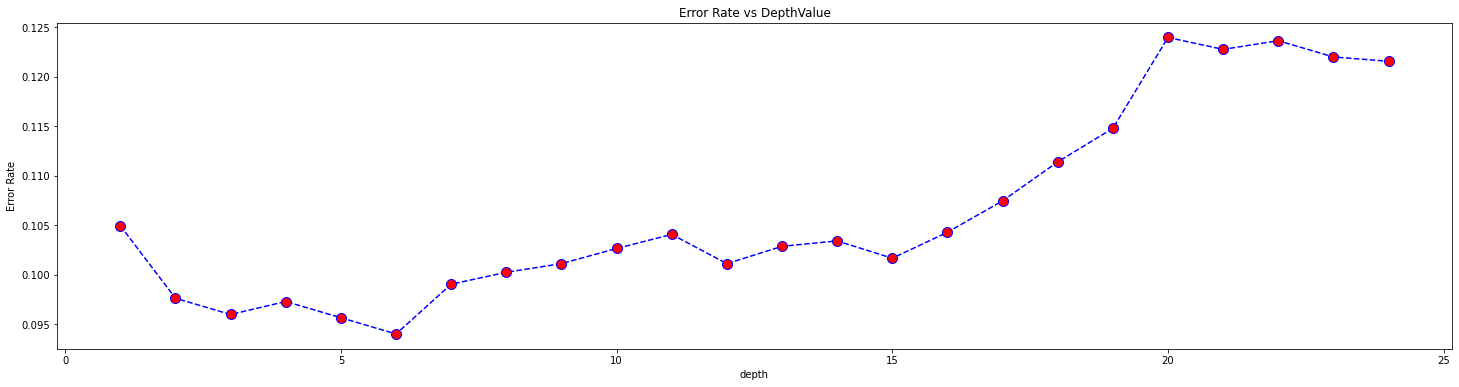

In [70]:
plt.figure(figsize=(25,6))
plt.plot(range(1,25),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

#### Hyperparameter tuning using GridSearchCV

In [71]:
%%time
# Create the parameter grid based on the results of random search 
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1,2],
    "max_depth":range(3,6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5,1.0],
    "n_estimators":[10]
    }

# Create the model
gb_model = GradientBoostingClassifier()

# Best model
opt_model_gb = GridSearchCV(gb_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_gb.fit(train_m5, train_m5_target)

print (opt_model_gb.best_estimator_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 1/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 2/5; 1/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 1/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estim

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 3/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 3/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 3/144] START

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 7/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 7/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 7/144] END criterion=friedman

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 10/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 10/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 10/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 10/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 10/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 11/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 14/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 14/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 14/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 15/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 15/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 15/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 18/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 18/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 18/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 18/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 18/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 18/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 23/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 23/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 23/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 23/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 26/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 26/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 26/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 26/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 26/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 27/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 31/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 31/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 31/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 31/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 31/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 31/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 35/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 35/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 35/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 35/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 35/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 35/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 37/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 38/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 38/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 38/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 38/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 38/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 43/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 43/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 43/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 43/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 45/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 46/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 46/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 46/144] START criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 46/144] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 46/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 51/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 51/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 51/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 51/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 51/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 51/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 55/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 55/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 55/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 55/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 55/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 55/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 59/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 59/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 59/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 59/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 59/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 59/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 62/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 62/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 62/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 63

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 67/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 67/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 67/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 67

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 70/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 70/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 70/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 70/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 70/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 70

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 75/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 75/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 75/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 75/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 75/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 75/144] END criteri

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 78/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 78/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 78/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 78/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 78/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 78

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 83/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 83/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 83/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 83/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 83/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 83

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 85/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 86/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 86/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 86/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 86/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 86

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 91/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 91/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 91/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 91/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 91/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 91

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 5/5; 93/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 94/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 94/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 94/144] START criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 2/5; 94/144] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 94

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 99/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 99/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 99/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 99/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 99/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 99/144]

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 102/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 102/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 102/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 103/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 1/5; 103/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 105/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 105/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 105/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 105/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 105/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 10

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 111/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 111/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 111/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 111/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 111/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 114/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 114/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 5/5; 114/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 1/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 119/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 119/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 11

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 2/5; 122/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 3/5; 122/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 3/5; 122/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 4/5; 122/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 4/5; 122/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 5/5; 12

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site


[CV 2/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 127/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 127/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 4/5; 127/144] END criter

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 3/5; 129/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 129/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 4/5; 129/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 129/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 129/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 133/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 133/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 133/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 134/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 134/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 1/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 2/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 2/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 3/5; 139/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5
[CV 3/5; 139/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 4/5; 13

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\bruno\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\bruno\anaconda3\lib\site

[CV 4/5; 141/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 5/5; 141/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5
[CV 5/5; 141/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=0.5; total time=   0.0s
[CV 1/5; 142/144] START criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0
[CV 1/5; 142/144] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=10, subsample=1.0; total time=   0.0s
[CV 2/5; 14

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.88824529 0.88824529        nan        nan
 0.88824529 0.88824529        nan        nan 0.88824529 0.88824529
        nan        nan 0.88824529 0.88824529        nan        nan
 0.88824529 0.88824529        nan        nan 0.88824529 0.88824529
        nan        nan 0.88824529 0.88824529        nan        nan
 0.88824529 0.88824529        nan        nan 0.88824529 0.88824529
        nan        nan 0.88824529 0.88824529        nan        nan
 0.88824529 0.88824529        nan        nan 0.88824529 0.88824529
        nan        nan 0.88824529 0.88824529        nan        nan
 0.88824529 0.88824529        nan        nan 0.88824529 0.88824529
        nan        nan 0.88824529 0.88824529        nan        nan
 0.88824529 0.88824529        nan        nan 0.88824529 0.88824529
        nan        nan 0.88824529 0.88824529        n

#### Create and fit the model

In [ ]:
# Create model with best parameters
gb_best_model = GradientBoostingClassifier(max_depth=6)

# Fit the best model
gb_best_model.fit(train_m5, train_m5_target)
gb_best_model

In [ ]:
predictions = gb_best_model.predict(test_m5)

# Confusion matrix
confusion = pd.crosstab(test_m5_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m5_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m5_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_gb = cross_val_score(gb_best_model, train_m5, train_m5_target, cv = 5).mean()
pecc_gb